In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [7]:
data= pd.read_excel("C:/Users/ANJALI/Downloads/Bankruptcy_data.xlsx")


In [8]:
data.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


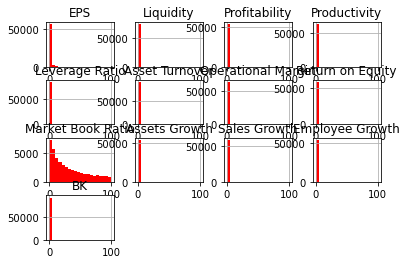

In [9]:
# Create histograms with custom parameters
data.hist(bins=20, range=(0, 100), color='red')

# Show the histograms
plt.show()

In [10]:
print("Number of records: ", len(data))
##Number of records:  92872

Number of records:  92872


In [11]:
print("Number of features: ", len(data.columns))
#Number of features:  13

Number of features:  13


In [12]:
print("Class balance: \n", data['BK'].value_counts())
#There is vclass imbalance 

Class balance: 
 0    92314
1      558
Name: BK, dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [13]:
data.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [10]:
### varience check
print(data.var())

EPS                   4.820077e+06
Liquidity             1.478922e+04
Profitability         4.586414e+05
Productivity          1.287773e+03
Leverage Ratio        6.402828e+04
Asset Turnover        4.477225e+00
Operational Margin    4.599313e+04
Return on Equity      1.243246e+05
Market Book Ratio     6.793132e+08
Assets Growth         5.441942e+03
Sales Growth          3.155335e+04
Employee Growth       1.980819e+02
BK                    5.972234e-03
dtype: float64


In [15]:
data.isnull().sum()
## There are missing values 

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [16]:
# Define a function to detect outliers using IQR method


import matplotlib.pyplot as plt
import pandas as pd

def detect_outliers(column):
    # Plot a boxplot to visualize the distribution of the data
    fig, ax = plt.subplots(figsize=(2, 6))
    ax.boxplot(column, vert=False)
    ax.set_title('Boxplot of ' + column.name)
    plt.show()
    
    # Calculate the quartiles and IQR
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3* iqr
    
    # Find the outliers outside the bounds
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Print the results
    if len(outliers) > 0:
        print('Number of outliers:', len(outliers))
        print('Outlier values:', outliers)
    else:
        print('No outliers detected.')

In [17]:
## X contains all the variables except target variable 
X = data.iloc[:, :-1]  # Select all columns except the last one as features
y = data.iloc[:, -1]   # Select the last column as target variable
X


,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


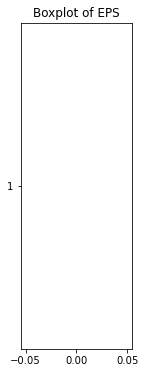

Number of outliers: 3043
Outlier values: 47        8.110000
48        7.310000
51      -12.400000
55       11.160000
56       11.370000
           ...    
92799   -26.000004
92808    -7.866132
92817   -10.543731
92819   -19.621416
92861    -9.465927
Name: EPS, Length: 3043, dtype: float64


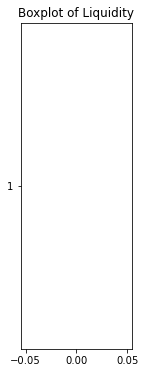

Number of outliers: 3162
Outlier values: 84        -5.350000
86        -6.950000
218       -1.940000
219     -783.170000
220     -366.310000
            ...    
92704     -3.166667
92705    -16.104167
92783     -1.646449
92839    -29.822917
92840    -50.944000
Name: Liquidity, Length: 3162, dtype: float64


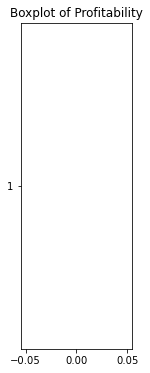

Number of outliers: 10664
Outlier values: 84        -22.170000
86        -22.800000
216        -4.890000
218       -10.990000
219     -4146.670000
            ...     
92812      -6.504996
92825      -4.302325
92839     -35.604167
92840     -70.040000
92847      -6.673620
Name: Profitability, Length: 10664, dtype: float64


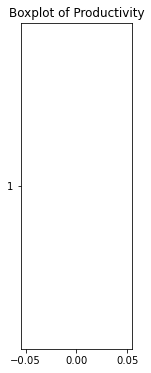

Number of outliers: 8496
Outlier values: 216       -1.910000
217       -0.680000
218       -4.510000
219     -354.500000
220        4.540000
            ...    
92825     -0.654588
92839     -4.354167
92840     -7.616000
92847     -1.445020
92864     -0.916160
Name: Productivity, Length: 8496, dtype: float64


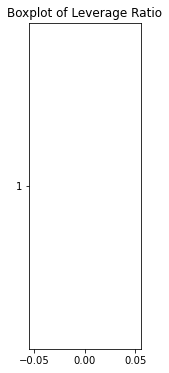

Number of outliers: 5850
Outlier values: 59         13.770000
60        302.830000
61        -24.660000
62         -9.940000
63        -22.100000
            ...     
92861     -10.901134
92864      -3.936324
92866       5.768961
92867   -1042.104918
92868      -4.530214
Name: Leverage Ratio, Length: 5850, dtype: float64


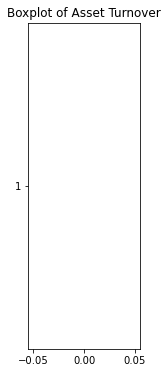

Number of outliers: 1028
Outlier values: 219      243.670000
220       12.460000
221       37.500000
222       46.500000
223       33.000000
            ...    
91999      4.896670
92001      4.742951
92540      4.901690
92828      5.433970
92829      5.907701
Name: Asset Turnover, Length: 1028, dtype: float64


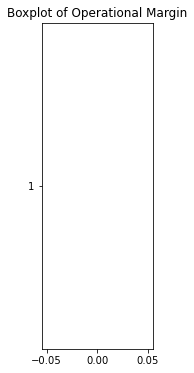

Number of outliers: 11022
Outlier values: 215        0.870000
216     -125.660000
217       -6.390000
218       -6.290000
219       -1.450000
            ...    
92862     -1.056751
92864     -6.147098
92866     -0.673847
92868     -0.561155
92871     -0.651048
Name: Operational Margin, Length: 11022, dtype: float64


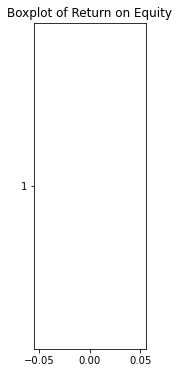

Number of outliers: 8363
Outlier values: 59       -3.410000
60       -0.590000
65       -0.700000
66       -0.570000
68      -16.860000
           ...    
92861    -5.634481
92866    -8.158593
92867    -6.614095
92868    -4.519074
92869    -0.569448
Name: Return on Equity, Length: 8363, dtype: float64


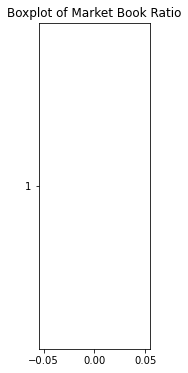

Number of outliers: 11599
Outlier values: 60        7168.180000
63       -2463.450000
71       12909.160000
72        2932.190000
73        3174.500000
             ...     
92738    -1815.569401
92752     -889.744112
92802     1108.521951
92809     4061.800000
92869     3274.505633
Name: Market Book Ratio, Length: 11599, dtype: float64


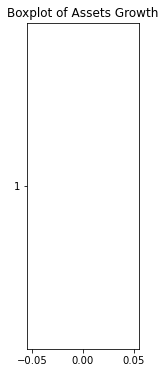

Number of outliers: 5645
Outlier values: 84        -0.931596
85        40.269841
86        -0.974423
87        59.503759
93         2.300355
            ...    
92810      4.650302
92831      1.321425
92841    245.152000
92863      4.243393
92865     11.124344
Name: Assets Growth, Length: 5645, dtype: float64


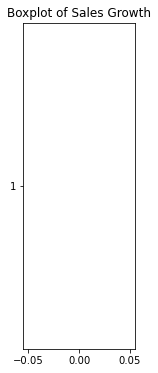

Number of outliers: 6298
Outlier values: 81       -1.000000
94        2.764018
122       1.927764
216       0.933333
217      16.482759
           ...    
92847    19.977011
92849     1.077683
92863     2.643836
92864     1.035446
92865    10.125858
Name: Sales Growth, Length: 6298, dtype: float64


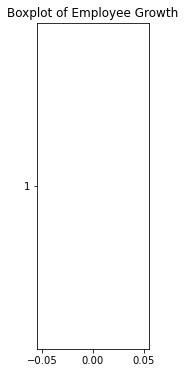

Number of outliers: 5877
Outlier values: 81       -0.933333
84       -1.000000
91        0.723404
93        5.946237
107       0.732301
           ...    
92841    70.500000
92849     6.285714
92857    14.835544
92863     2.666667
92865     4.454545
Name: Employee Growth, Length: 5877, dtype: float64


In [18]:
for col in X.columns:
    detect_outliers(X[col])
    ## each  variables( columns) contaion outliers

<AxesSubplot:>

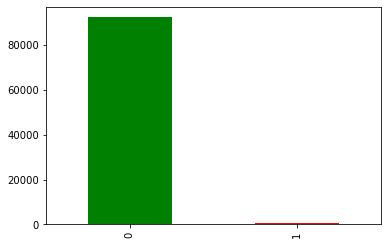

In [19]:
## The column “BK” in the data provided denotes whether the company goes bankrupt (indicated by 1) 2 years in the future has less records than  company won't be bankrupt (indicated by 0).
# imbalance in data 
y.value_counts().plot.bar(color=['green', 'red'])

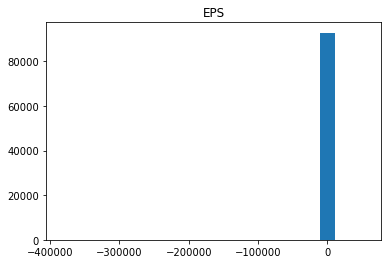

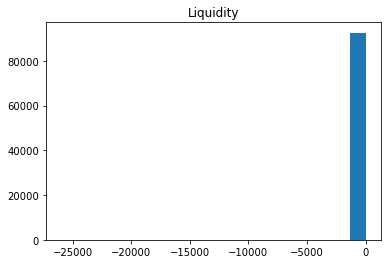

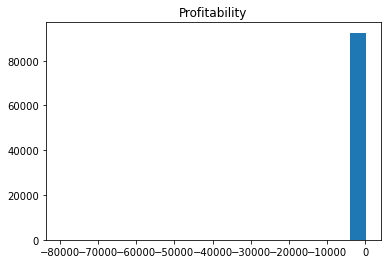

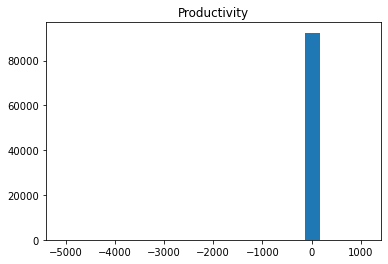

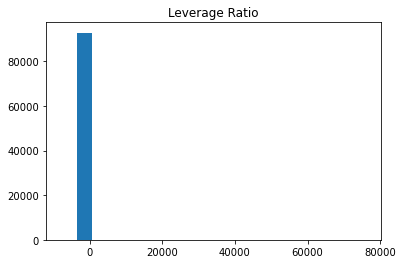

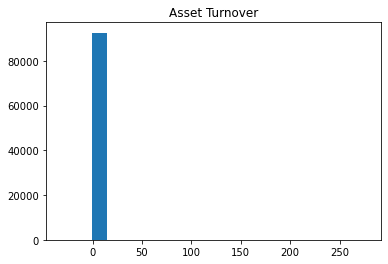

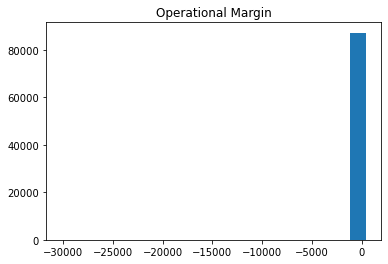

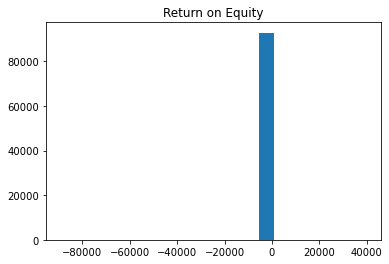

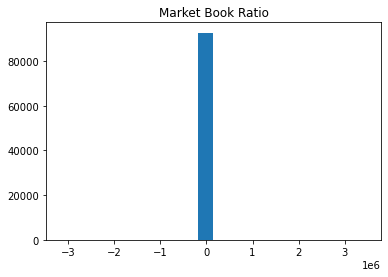

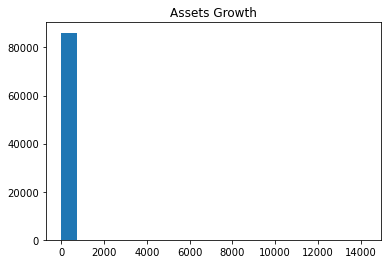

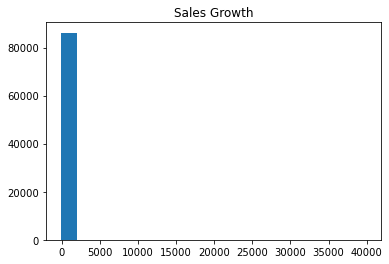

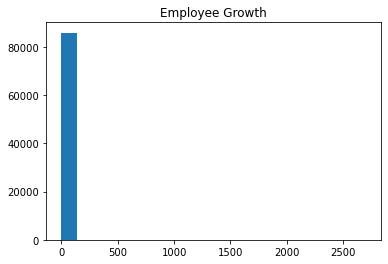

In [20]:
# Loop over each column (except the last one)
for col in data.columns[:-1]:
    # Handle outliers using the interquartile range method
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + (3 * iqr)
    lower_bound = q1 - (3 * iqr)
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    
    # Create a histogram of the column values
    plt.hist(data[col], bins=20)
    plt.title(col)
    plt.show()

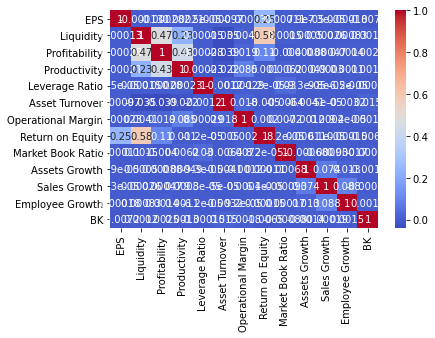

In [21]:
# Correlation Matrix
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


In [23]:
# Save the outlier removed dataset to a CSV file
data.to_csv('cleaned_dataset.csv', index=False)
df = pd.read_csv('cleaned_dataset.csv')


In [7]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [24]:
# Split the data into training and testing sets
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]# target variable
import random

random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Impute missing values using median imputation
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
# Standardize the data  to improve the performance of the algorithms and to ensures that the features are on the same scale.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# balancing data using class weighting
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [29]:
# Modelling  data using different algorithms
#Here being not bankruptcy records  are much more than being bankruptcy, the model can be biassed in favour of that class. To handle this,, the class weight option might assist the model give the minority class greater weight.
lr = LogisticRegression(class_weight={0:class_weights[0], 1:class_weights[1]})
dt = DecisionTreeClassifier(class_weight={0:class_weights[0], 1:class_weights[1]})
rf = RandomForestClassifier(class_weight={0:class_weights[0], 1:class_weights[1]})



In [30]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1)


In [31]:
# Evaluate logistic regression model
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)

Confusion Matrix:
 [[12980  5481]
 [   56    58]]
Accuracy: 0.7019111709286676
Precision: 0.010471204188481676
Recall: 0.5087719298245614
F1 Score: 0.020520077834777994


In [ ]:
###logistic model
#-Accuracy: 0.7019111709286676
#Precision: 0.010471204188481676
#Recall: 0.5087719298245614
#F1 Score: 0.020520077834777994

In [32]:
# evaluate decision tree model
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test)



Confusion Matrix:
 [[18371    90]
 [  102    12]]
Accuracy: 0.9896635262449529
Precision: 0.11764705882352941
Recall: 0.10526315789473684
F1 Score: 0.1111111111111111


In [ ]:
#### decision tree
#Accuracy: 0.9892328398384926
#Precision: 0.11764705882352941
#Recall: 0.10526315789473684
#F1 Score: 0.1111111111111111

In [33]:
# evaluate random forest model
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)


Confusion Matrix:
 [[18461     0]
 [  113     1]]
Accuracy: 0.9939165545087483
Precision: 1.0
Recall: 0.008771929824561403
F1 Score: 0.017391304347826087


In [ ]:
##Random forest
#Accuracy: 0.9939165545087483
#Precision: 0.5
#Recall: 0.008771929824561403
#F1 Score: 0.017241379310344827

In [ ]:
#Compared to the logistic model, the accuracy of the decision tree and 
#random forest models is significantly greater. All three models' accuracy and 
#recall metrics, however, are poor, which raises the possibility that there may
#be problems with the models' capacity to distinguish between positive and
#negative events.Comparing accuracy, precision, recall and F1 score of 3 models 
#I would choose Logistic regression and decision tree.

In [ ]:
#LOGISTIC REGRESSION best parameter selection

In [41]:
lr_params = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": [0.1, 1, 10],
    "solver": ['newton -cg', 'lbfgs', 'liblinear', 'saga'],
    "max_iter": [100, 200, 500],
    "class_weight": [None, 'balanced']
}

In [ ]:
# training a Logistic Regression model using GridSearchCV to tune hyperparameters, 
#and then evaluating the best estimator on the test set.
lr_cv = GridSearchCV(lr, lr_params, cv=5)
lr_cv.fit(X_train, y_train)
print('Best Parameters:', lr_cv.best_params_)
print("Accuracy: {:.2f}%".format(lr_cv.score(X_test, y_test)*100))
evaluate_model(lr_cv.best_estimator_, X_test, y_test)

In [ ]:
y_pred = lr_cv.predict(X_test)
accuracy = lr_cv.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Best Logistic Regression grid Report:")
print(Logistic Regression_report(y_test, y_pred))

In [ ]:

#Best Parameters: {'penalty': 'l1','C': 1, 'solver': 'liblinear', 'class_weight':'balanced','max_iter':100}
#Accuracy: 78%

In [ ]:
#Decision Tree best parameter selection

In [ ]:
dt_params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": [None, 'balanced']
}

In [38]:
dt_cv = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1)
dt_cv.fit(X_train, y_train)

print('Best Parameters:', dt_cv.best_params_)
print("Accuracy: {:.2f}%".format(dt_cv.score(X_test, y_test)*100))

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 99.38%


In [39]:
dt_cv = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1)
dt_cv.fit(X_train, y_train)
print('Best Parameters:', dt_cv.best_params_)
evaluate_model(dt_cv.best_estimator_, X_test, y_test)


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Confusion Matrix:
 [[18460     1]
 [  114     0]]
Accuracy: 0.9938088829071332
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [ ]:
y_pred = dt_cv .predict(X_test)
accuracy = dt_cv .score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Best Decision tree grid Report:")
print("Decision tree_report(y_test, y_pred)"")


In [ ]:
#Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
#Accuracy: 99.38%